# Principal Component Analysis

Proposed by Pearson in 1901 and further developed by Hotelling in 1993.

## Objective

Given $X_1, X_2, \ldots, X_d$, we want to extract the most useful information of $p$ measurements such that

1. **explore underlying dimension** behind the $p$ original measurements to explain the variation of $p$ original measurements, which may have interesting or revealing interpretations, such as size, shape and contrasts in natural science;

2. **estimate latent variables** (i.e. variables that cannot be measured or observed.) which can explain the variation of the $p$ original measurements, especially in
social behavioral sciences.

3. **simplify the dimension** of the observed data set. Lower dimension can be chosen from the data set such that the variations of measurements can be captured with an acceptable level. For example, $k \ll d$ latent variables are chosen to capture 90% of variation of $p$ original measurements. Indeed, this can be regarded as the data reduction or dimension reduction.


Consider a $d$-dimensional random vector $\boldsymbol{x} = \left( X_1, X_2, \ldots, X_d \right)^\top$ with mean vector $\boldsymbol{\mu} = \left( \mu_1, \ldots, \mu_d \right)^\top$ and covariance matrix $\boldsymbol{\Sigma}$. PCA aims to obtain the variables $Z_1, Z_2, \ldots, Z_k$ which are the **linear combinations** of $X_1, X_2, \ldots, X_d$ and $k \le d$, such that

- The sum of the new individual variances

  $$
  \operatorname{Var}\left( Z_1 \right) + \operatorname{Var}\left( Z_2 \right) + \ldots + \operatorname{Var}\left( Z_k \right)
  $$

  is **close** to the sum of the original individual variances

  $$
  \operatorname{Var}\left( X_1 \right) + \operatorname{Var}\left( X_2 \right) + \ldots + \operatorname{Var}\left( X_d \right)
  $$

- The linear combinations $Z_i$ and $Z_j$ are **uncorrelated** for $i\ne j$. This imply that each variable in $\boldsymbol{z} = \left( Z_1, Z_2, \ldots, Z_k \right)^\top$ can be analyzed by using **univariate** techniques.


Other formulations of PCA based on sample data matrix $\boldsymbol{X}$: Find a linear mapping $\mathbb{R} ^d \rightarrow \mathbb{R} ^k$ (assume $\boldsymbol{X}$ is centered) to project the data matrix $\boldsymbol{X}_{n \times d}$ to a lower dimensional embedding matrix $\boldsymbol{Z}_{n \times k}$.


$$\begin{aligned}
\boldsymbol{z}_i &= \boldsymbol{W}_{d \times k} ^\top \boldsymbol{x}_i \\
\boldsymbol{Z}_{n \times k} &= \boldsymbol{X}_{n \times d}  \boldsymbol{W} _{d \times k} \\
\end{aligned}$$

The mapping $\boldsymbol{W} _{d \times k}$ are also called **loadings**, and the embeddings $\boldsymbol{Z} _{n \times k}$ are called **scores**. The loadings can be used to visualize how the original variables $X_j$ contributes to each principal component $Z_j$. The scores $\boldsymbol{Z} _{n \times k}$ can then be used for downstream tasks, e.g. visualization.

- Maximize the total variances $\sum_i \operatorname{Var}\left( Z_i \right)$ of the projected data $\boldsymbol{Z} =  \boldsymbol{X}  \boldsymbol{W}$ (similar to the population formulation above)

    $$\begin{align}
    \boldsymbol{W}^*  = \underset{\boldsymbol{\boldsymbol{W} } }{\operatorname{argmax}} \, & \operatorname{tr}\left( \boldsymbol{Z} ^\top \boldsymbol{Z}  \right)   \\
     = \underset{\boldsymbol{\boldsymbol{W} } }{\operatorname{argmax}} \, & \operatorname{tr}\left( (\boldsymbol{X}\boldsymbol{W}) ^\top \boldsymbol{X} \boldsymbol{W} \right)   \\
     \text{s.t.}  & \ \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
       &\ \boldsymbol{W} \in \mathbb{R} _{d \times k}
    \end{align}$$

- Minimize total reconstruction loss, where $\hat{\boldsymbol{x} }_i = \boldsymbol{W} \boldsymbol{z} _i = \boldsymbol{W} \boldsymbol{W} ^{\top} \boldsymbol{x} _i$

    $$\begin{align}
    \boldsymbol{W}^*  = \underset{\boldsymbol{\boldsymbol{W} } }{\operatorname{argmin}} \, & \sum_i^n \left\Vert \boldsymbol{x}_i - \hat{\boldsymbol{x} }_i \right\Vert ^2    \\
     \text{s.t.}  & \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
       &\ \boldsymbol{W} \in \mathbb{R} _{d \times k}
    \end{align}$$

- Low-dimensional Hyperplane fitting

  Fit a low-dimensional hyperplane such that, when we project our data $\boldsymbol{X}$ onto the hyperplane and obtain $\boldsymbol{Z}$, the variance of our data is changed as little as possible. The low-dimensional hyperplane is defined by $\boldsymbol{W}$, which is the matrix of basis vectors that span it. Minimizing the change in variance between the original data $\boldsymbol{X}$ and its reconstruction $\boldsymbol{Z} \boldsymbol{W}^{\top}$ is equivalent to minimizing the sum of squared error loss:

  $$\begin{align}
  \boldsymbol{W}^*  = \underset{\boldsymbol{\boldsymbol{W} } }{\operatorname{argmin}} \, & \sum_i^n \left\Vert \boldsymbol{x}_i - \boldsymbol{W} \boldsymbol{z} _i \right\Vert ^2    \\
   \text{s.t.}  & \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
     &\ \boldsymbol{W} \in \mathbb{R} _{d \times k}
  \end{align}$$


## Learning

### Sequential Maximization

The first variable in $\boldsymbol{z}$, i.e. $Z_1 = \boldsymbol{u} \boldsymbol{x}$ is obtained to maximize its variance, i.e.,

$$
\operatorname{Var}\left(Z_{1}\right)=\max _{\left\Vert \boldsymbol{u}  \right\Vert _2^2 = 1 } \boldsymbol{u}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}
$$

where the constraint is to removes scaling or $\boldsymbol{u}$. Suppose the maximum is achieved at $\boldsymbol{u} = \boldsymbol{u} _1$ and we call the variable $Z_1$ given below the **first population principal component**

$$
Z_1 = \boldsymbol{u} _1^{\top} \boldsymbol{x}
$$

Successively for $k=2, \ldots, d$ the variance of $Z_i$ can be obtained by the following maximization

$$\begin{aligned}
\max _{\boldsymbol{u} _k} && \boldsymbol{u}_k^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_k & \\
\mathrm{s.t.}
&& \quad \boldsymbol{u}_k^{\top} \boldsymbol{u}_k&=1 \\
&& \boldsymbol{u}_k ^{\top} \boldsymbol{u} _j &= 0  \text{  for }  j=1, \ldots, k-1 \\
\end{aligned}$$

where the second constraint $\boldsymbol{u}_k ^{\top} \boldsymbol{u} _j = 0$ comes from the identity

$$
\begin{aligned}
\operatorname{Cov}\left(Z_{k}, Z_{j}\right)  &=\operatorname{Cov}\left(\boldsymbol{u} _{k}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
&=\boldsymbol{u}_{k}^{\top} \operatorname{Cov}(\boldsymbol{x}, \boldsymbol{x}) \boldsymbol{u}_{j} \\
&=\boldsymbol{u}_{k}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
&=\boldsymbol{u}_{k}^{\top} \lambda_{j} \boldsymbol{u}_{j} \\
&=\lambda_{j} \boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{j}
\end{aligned}
$$

Since $\lambda_j > 0$ and we want uncorrelated principal components $\operatorname{Cov}\left(Z_k, Z_{j}\right) = 0$, we obtain $\boldsymbol{u} _k ^{\top} \boldsymbol{u} _j = 0$.

After we solve $\boldsymbol{u} _k$, the $k$-th population principal component is then

$$
Z_k = \boldsymbol{u} _k^\top \boldsymbol{x}
$$

:::{admonition,dropdown,seealso} Derivation

The problem to find $\boldsymbol{u} _1$ is an [Rayleigh quotient](rayleigh-quotient) problem which has been solved there. We show how to solve the subsequent $\boldsymbol{u} _k$ for $k \ge 2$.

When $k=2$, the problem is

$$\begin{aligned}
\max _{\boldsymbol{u} _2} && \boldsymbol{u}_2^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_2 & \\
\mathrm{s.t.}
&& \quad \boldsymbol{u}_2^{\top} \boldsymbol{u}_2&=1 \\
&& \boldsymbol{u}_2 ^{\top} \boldsymbol{u} _1 &= 0\\
\end{aligned}$$

The Lagrangean is

$$
\mathcal{L}_{2}=\boldsymbol{u}_{2}^{\top} \Sigma \boldsymbol{u}_{2}-\lambda\left(\boldsymbol{u}_{2}^{\top} \boldsymbol{u}_{2}-1\right)-\delta\left(\boldsymbol{u}_{2}^{\top} \boldsymbol{u}_{1}-0\right)
$$

Taking derivative w.r.t. $\boldsymbol{u} _2$ gives

$$
\frac{\partial \mathcal{L}_{2}}{\partial \boldsymbol{u}_{2}}=2 \boldsymbol{\Sigma} \boldsymbol{u}_{2}-2 \lambda \boldsymbol{u}_{2}-\delta \boldsymbol{u}_{1}=0
$$

Left-multiply $\boldsymbol{u} _1 ^{\top}$ we have

$$
\begin{aligned}
RHS &= \boldsymbol{u}_{1}^{\top} \boldsymbol{0} =0 \\
LHS &=2\left(\boldsymbol{u}_{1}^{\top} \Sigma \boldsymbol{u}_{2}-\boldsymbol{u}_{1}^{\top} \lambda \boldsymbol{u}_{2}\right)-\boldsymbol{u}_{1}^{\top} \delta \boldsymbol{u}_{1} \\
&=2\left(\left(\boldsymbol{\Sigma} \boldsymbol{u}_{1}\right)^{\top} \boldsymbol{u}_{2}-\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}\right)-\delta \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{1} \\
&=2\left(\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}-\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}\right)-\delta \\
&=- \delta
\end{aligned}
$$

Hence $\delta = 0$. Substituting this back gives $\Sigma \boldsymbol{u} _2= \lambda\boldsymbol{u} _{2}$. Thus, $\boldsymbol{u} _2$ is an eigenvector of $\boldsymbol{\Sigma}$ with eigenvalue $\lambda$. The objective is then $\boldsymbol{u} _2 \boldsymbol{\Sigma} \boldsymbol{u} _2 = \lambda$. Hence, we choose $\lambda_2$, and choose $\boldsymbol{u} _2$ to be the eigenvector of $\boldsymbol{\Sigma}$ associated with $\lambda_2$.

For $k=3, \ldots, n$, the Lagrangean is


$$
\mathcal{L}_{k}=\boldsymbol{u}_{k}^{\top} \Sigma \boldsymbol{u}_{k}-\lambda\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{k}-1\right)-\delta_{1}\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{1}\right)-\cdots-\delta_{k-1}\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{k-1}\right)
$$

Taking derivative gives

$$
\begin{aligned}
\frac{\partial L_{k}}{\partial \boldsymbol{u}_{k}} &=2(\Sigma-\lambda I) \boldsymbol{u}_{k}-\delta_{1} \boldsymbol{u}_{1}-\cdots-\delta_{k-1} \boldsymbol{u}_{k-1} \\
&=2 \boldsymbol{\Sigma} \boldsymbol{u}_{k}-2 \lambda \boldsymbol{u}_{k}-\delta_{1} \boldsymbol{u}_{1}-\cdots-\delta_{k-1} \boldsymbol{u}_{k-1} \\
&=0
\end{aligned}
$$

Similarly, left multiplying $\boldsymbol{u} _j ^{\top}$ gives $\delta_j=0$ for $j=1, \ldots, k-1$. Substituting $\delta_j=0$ back gives $\boldsymbol{\Sigma} \boldsymbol{u} _k = \lambda \boldsymbol{u} _k$. We can then choose the $k$-th largest eigenvalue $\lambda_k$ and the associated eigenvector to be $\boldsymbol{u}_k$.

:::

### Spectral Decomposition

Rather than obtaining the principal components sequentially, the principal components and their variances can be obtained simultaneously by solving for the eigenvectors and eigenvalues of $\boldsymbol{\Sigma}$. Its [spectral decomposition](eigen-decomposition) is,

$$
\boldsymbol{\Sigma}  = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top = \sum_i^d \lambda_i \boldsymbol{u} _i \boldsymbol{u} _i ^\top
$$

where
- $\lambda_1 > \lambda_2 > \dots> \lambda_d \ge 0$ are ordered eigenvalues of $\boldsymbol{\Sigma}$: $\boldsymbol{\Lambda} =  \operatorname{diag}(\lambda_1, \lambda_2, \ldots, \lambda_d)$
- $\boldsymbol{u} _1, \ldots, \boldsymbol{u} _d$ are their corresponding normalized eigenvectors forming the column vectors of the orthogonal matrix $\boldsymbol{U} = \left( \boldsymbol{u} _1\  \boldsymbol{u} _2 \ \ldots \  \boldsymbol{u} _d \right)$, where $\boldsymbol{U}  ^\top \boldsymbol{U}   = \boldsymbol{I}$ or $\boldsymbol{u} _i ^\top \boldsymbol{u} _j = 1$ if $i=j$ and 0 otherwise.



The $k$-th population principal component is defined as

$$
Z_{k}=\boldsymbol{u}_{k}^{\top} \boldsymbol{x}=u_{1 k} X_{1}+u_{2 k} X_{2}+\cdots+u_{d k} X_{k}, \quad k=1, \ldots, d
$$

The principal component transform using the first $k$ principal directions is then

$$
\boldsymbol{z} = \boldsymbol{U}_{[:k]} ^\top \boldsymbol{x}
$$

or

$$
\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{U} _{[:k]}
$$

where $\boldsymbol{U} _{[:k]}$ means the matrix consisting of the first $k$ columns of $\boldsymbol{U}$.

## Properties

1. All principal components are uncorrelated, i.e., $\operatorname{Cov}\left( Z_i, Z_j \right) = 0$ for $i \ne j$


    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \operatorname{Cov}\left(Z_{i}, Z_{j}\right) &=\operatorname{Cov}\left(\boldsymbol{u}_{i}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\mathrm{E}\left(\boldsymbol{u}_{i}^{\top}(\boldsymbol{x}-\boldsymbol{\mu})(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{u}_{j}\right) \\
    &=\boldsymbol{u}_{i}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
    &=\boldsymbol{u}_{i}^{\top} \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^{\top} \boldsymbol{u}_{j} \\
    &=\left(\boldsymbol{u}_{i}^{\top}\right)\left(\boldsymbol{u}_{1} \boldsymbol{u}_{2} \cdots \boldsymbol{u}_{d}\right) \boldsymbol{\Lambda}\left(\begin{array}{c}
    \boldsymbol{u}_{1}^{\top} \\
    \boldsymbol{u}_{2}^{\top} \\
    \vdots \\
    \boldsymbol{u}_{d}^{\top}
    \end{array}\right) \boldsymbol{u}_{j} \\
    &=\boldsymbol{e}_{i}^{\top} \boldsymbol{\Lambda} \boldsymbol{e}_{j} \\
    &=0
    \end{aligned}
    $$
    :::


1. The variance of the $i$-th principal component is $\lambda_i$, i.e. $\operatorname{Var}\left( Z_i \right) = \lambda_i$.

    :::{admonition,dropdown,seealso} *Proof*

    $$\begin{aligned}
    \operatorname{Var}\left( Z_i \right)
    &= \operatorname{Var}\left( \boldsymbol{u} _i ^\top \boldsymbol{x}  \right) \\
    &= \boldsymbol{u} _i ^\top \boldsymbol{\Sigma} \boldsymbol{u} _i \\
    &= \boldsymbol{e}_i ^\top \boldsymbol{\Lambda} \boldsymbol{e}_i  \\
    &= \lambda_i
    \end{aligned}$$
    :::

1. The first principal component $Z_1 = \boldsymbol{u} _1 ^\top \boldsymbol{x}$ has the largest variance among all linear combinations of $X_i$'s. Then for $i=2, \ldots, p$, the $i$-th principal component has the largest variance among all linear combinations of $X_i$'s, which are uncorrelated with the first $(i-1)$ principal components.


1. The principal component preserve the total variance

    $$
    \sum_{i=1}^{d} \operatorname{Var}\left(Z_{i}\right)=\sum_{i=1}^{d} \operatorname{Var}\left(X_{i}\right)
    $$

    or

    $$
    \sum_{i=1}^{d} \lambda_{i}=\sum_{i=1}^{d} \sigma_{i i}
    $$

    Hence, the PCA procedure, the total variance is preserved by re-allocated to $\operatorname{Var}\left( Z_1 \right) \ge \operatorname{Var}\left( Z_2 \right) \ge \ldots \operatorname{Var}\left( Z_d \right)$.

    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \sum_{i=1}^{d} \sigma_{i i} &=\operatorname{tr}(\boldsymbol{\Sigma}) \\
    &=\operatorname{tr}\left(\sum_{i=1}^{d} \lambda_{i} \boldsymbol{u}_{i} \boldsymbol{u}_{i}^{\top}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i} \operatorname{tr}\left(\boldsymbol{u}_{i} \boldsymbol{u}_{i}^{\top}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i} \operatorname{tr}\left(\boldsymbol{u}_{i}^{\top} \boldsymbol{u}_{i}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i}
    \end{aligned}
    $$
    :::


1. If the correlation matrix $\boldsymbol{\rho} = \boldsymbol{D}^{-1}\boldsymbol{\Sigma} \boldsymbol{D}^{-1}$ instead of the covariance matrix $\boldsymbol{\Sigma}$ is used, i.e. variables $X_1, X_2, \ldots, X_d$ are standardized, then


   $$
   \sum_i^d \lambda_i = \sum_i^d \sigma_{ii} = \sum_i^d 1 =  d
   $$

1. The correlation between a principal component $Z_j$ and an original variable $X_i$ is given by

    $$
    \operatorname{Corr}\left( X_i, Z_j \right) = \frac{\sqrt{\lambda_j}a_{ij}}{\sqrt{\sigma_{ii}}}
    $$

    where $u_{ij}$ denotes the $i$-th element of $\boldsymbol{u} _j$.

    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \operatorname{Cov}\left(X_{i}, Z_{j}\right) &=\operatorname{Cov}\left(X_{i}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\operatorname{Cov}\left(\boldsymbol{e}_{i}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\boldsymbol{e}_{i}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
    &=\boldsymbol{e}_{i}^{\top} \sum_{k=1}^{d} \lambda_{k} \boldsymbol{u}_{k} \boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} \boldsymbol{e}_{i}^{\top} \boldsymbol{u}_{j} \boldsymbol{u}_{j}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} \boldsymbol{e}_{i}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} u_{i j}
    \end{aligned}
    $$

    and then

    $$\begin{align}
    \operatorname{Corr}\left(X_{i}, Z_{j}\right)
    &=\frac{\operatorname{Cov}\left(X_{i}, Z_{j}\right)}{\sqrt{\operatorname{Var}\left(X_{i}\right) \operatorname{Var}\left(Z_{j}\right)}} \\
    &=\frac{\lambda_{j} u_{i j}}{\sqrt{\sigma_{i i} \lambda_{j}}} \\
    &=\frac{\sqrt{\lambda_{j}} u_{i j}}{\sqrt{\sigma_{i i}}}
    \end{align}$$
    :::




## Tuning

There are several ways to choose the number of principal components to retain.

1. **Cumulative proportion cutoff**:

    Include the components such that the cumulative proportion of the total variance explained is just more than a threshold value, say 80%, i.e., if

    $$
    \begin{equation}
    \frac{\sum_{i=1}^{k} \operatorname{Var}\left( Z_i \right)}{\sum_{i=1}^{d} \operatorname{Var}\left( X_i \right)} >0.8
    \end{equation}
    $$

    This method keeps $m$ principal components.

1. **Proportion cutoff**

    Select the components whose eigenvalues are greater than a threshold value, say average of eigenvalues; for correlation matrix input, this average is $d^{-1} \sum_{i=1}^{d} \operatorname{Var}\left( Z_i \right)=d^{-1} d=1$ if we use the correlation matrix $\boldsymbol{\rho}$.

1. **Scree plot**

    Construct the so-called scree plot of the eigenvalue $\ell_i$ on the vertical axis versus $i$ on horizontal axis with equal intervals for $i = 1, 2, \ldots, d$, and join the points into a decreasing polygon. Try to find a “clean-cut” where the polygon “levels off” so that the first few eigenvalues seem to be far apart from the others.

    :::{figure,myclass} pca-scree-plot
    <img src="../imgs/pca-scree-plot.png" width = "50%" alt=""/>

    Scree plot of $\lambda$. [Fung 2021]
    :::

1. **Hypothesis testing**

    Perform formal significance tests to determine the larger an unequal eigenvalues and retain the principal components to these eigenvalues.

1. **Reconstruction loss**

    Recall the principal component transform $\boldsymbol{z} = \boldsymbol{U}_{[:k]} ^\top \boldsymbol{x}$. Hence, to reconstruct $\hat{\boldsymbol{x} }$ by the first $k$ components $\boldsymbol{u} _1, \ldots, \boldsymbol{u} _k$ in $\boldsymbol{U}$ , we can use the expansion

    $$
    \hat{\boldsymbol{x} }= \boldsymbol{U}_{[:k]} \boldsymbol{z} =\sum_{j=1}^{k}z_j \boldsymbol{u} _{j} = \sum_{j=1}^{k}\left(\boldsymbol{u}_{j}^{\top} \boldsymbol{x} \right) \boldsymbol{u} _{j}
    $$

    If $\boldsymbol{x}$ was centered before PCA, we add the mean back

    $$
    \hat{\boldsymbol{x} }=\boldsymbol{\mu} _{\boldsymbol{x}} +\sum_{j=1}^{k}\left(\boldsymbol{u}_{j}^{\top} \boldsymbol{x} \right) \boldsymbol{u} _{j}
    $$

    To choose an optimal number of principal components $k$, we can examine the magnitude of the residual $\left\Vert \boldsymbol{x} - \hat{\boldsymbol{x} } \right\Vert ^2$. The expected residual corresponds to variance in the **remaining** subspace.

    :::{figure,myclass} pca-reconstruction
    <img src="../imgs/pca-reconstruction.png" width = "80%" alt=""/>

    Reconstruction of digits with mean and principal components [Livescu 2021]
    :::


1. **Downstream task performance**

    Use the performance of the downstream task to choose an optimal number of principal components.


## Interpretation

### Geometric Meaning: Direction of Variation

For the distribution of $\boldsymbol{x}$, thelcenter location is determined by $\boldsymbol{\mu} _ X$ and the variation is captured by each principal direction $\boldsymbol{u} _i$


For the multinormal distribution, the family of **contours** of $\boldsymbol{x}$ (on each of which the pdf is a constant) is a family of ellipsoids in the original coordinate system $\boldsymbol{x}$ satisfying the following equation for a
constant $c$,

$$
\begin{equation}
(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})=c^{2}
\end{equation}
$$

where $c$ serves as an index of the family. This family of ellipsoids have orthogonal principal axes

$$
\pm c\lambda_i^{1/2}\boldsymbol{u}_i, i= 1, 2, \ldots, p
$$

with length
- $2c\lambda_i^{1/2}$
- directional cosines as coefficients given in $\boldsymbol{u} _i$ for the $i$-th axis.

:::{figure} pca-gausian-ellipsoids
<img src="../imgs/pca-pc-ellipsoids.png" width = "80%" alt=""/>

PCA and Ellipsoids of Gaussian [Fung 2018]
:::


Another example is hand written digits. Suppose $\boldsymbol{\mu} _ \boldsymbol{x}$ is the sample mean that determines the "mean" appearance of the digit $2$, then $\boldsymbol{\phi}_j$ is a principal direction which determines the location of variation of the black/white pixels.


:::{figure,myclass} pca-reconstruction-scale
<img src="../imgs/pca-pc-digits.png" width = "50%" alt=""/>

Reconstruction of digits with mean and scaled principal components [Livescu 2021]
:::

### Proportion Explained

The proportion of total variance explained by $Z_i$, which is

$$\frac{\lambda_i}{\sum_{j=1}^d \lambda_j}$$

is considered as a measure of **importance** of $Z_i$ in a more parsimonious description of the system.

### Score of an Observation in Sample Data

For a data set of $n$ observations, we decompose the sample covariance matrix $S$ as

$$
\begin{equation}
\boldsymbol{S} =\sum_{i=1}^{d} \ell_{i} \boldsymbol{u} _{i} \boldsymbol{u} _{i}^{\top}=\boldsymbol{U} \boldsymbol{L}  \boldsymbol{U} ^\top
\end{equation}
$$

where $\ell_i$ are eigencalues of $\boldsymbol{S}$ and $\boldsymbol{u} _i$'s are their corresponding normalized eigenvectors.

The $j$-th **sample** principal component is defined as

$$
\begin{equation}
Z_{j}=\boldsymbol{u}_{j}^{\top} \boldsymbol{x}=u_{1 j} X_{1}+u_{2 j} X_{2}+\cdots+u_{d j} X_{d}
\end{equation}
$$

where $\begin{equation}
\boldsymbol{u}_{j}^{\top}=\left(\begin{array}{llll}
u_{1 j} & u_{2 j} & \cdots & u_{d j}
\end{array}\right)
\end{equation}$.

The data layout is

$$
\begin{equation}
\begin{array}{cccccccc}
&& \text{Data} \ \ \boldsymbol{X}  &&&&\text{PC} \ \ \boldsymbol{Z} &\\
\hline X_{1} & X_{2} & \cdots & X_{d} & \quad \quad Z_{1} & Z_{2} & \cdots & Z_{k} \\
x_{11} & x_{12} & \cdots & x_{1 d} & \quad \quad z_{11} & z_{12} & \cdots & z_{1 k} \\
x_{21} & x_{22} & \cdots & x_{2 d} & \quad \quad z_{21} & z_{22} & \cdots & z_{2 k} \\
& & \vdots & & & & \vdots & \\
x_{n 1} & x_{n 2} & \cdots & x_{n d} & \quad \quad z_{n 1} & z_{n 2} & \cdots & z_{n k}
\end{array}
\end{equation}
$$

where the corresponding row vectors on the data matrices are related as

$$\boldsymbol{z} _i = \boldsymbol{U}^\top  \boldsymbol{x} _i , i= 1, 2, \ldots, n$$

where $\boldsymbol{z} _i$ can be interpreted as a vector of principal component scores for the $i$-th observation.


```{margin}
Properties of the population principal components are all valid in the sample context, by replacing

$$\boldsymbol{\mu}, \boldsymbol{\Sigma} , \boldsymbol{\rho}, \lambda_i, \boldsymbol{u} _i$$

by

$$\bar{\boldsymbol{x}}, \boldsymbol{S} , \boldsymbol{R} , \ell_i, \boldsymbol{a} _i$$
```



## Special Cases

### Variables are Uncorrelated

If $\boldsymbol{X_i}$ are uncorrelated, then $\boldsymbol{\Sigma}$ is a diagonal matrix, i.e., $\boldsymbol{\Sigma} = \operatorname{diag}\left( \sigma_{11}, \sigma_{22}, \ldots, \sigma_{dd} \right)$. Without loss of generality, assume $\sigma_{11} > \sigma_{22} > \ldots > \sigma_{dd}$, then from its spectral decomposition $\boldsymbol{\Sigma} = \boldsymbol{U} ^\top \boldsymbol{\Lambda} \boldsymbol{U}$, we have
- $\boldsymbol{U} = \boldsymbol{I}$
- $\boldsymbol{\Lambda} = \operatorname{diag}\left( \sigma_{ii} \right)$, or $\lambda_i = \sigma_{ii}$.

Hence, the principal component is

$$
Z_i = X_i
$$

Clearly, it is **not** necessary to perform PCA in this case.

### Variables are Perfectly Correlated

In this case, the covariance matrix is not of full rank, i.e., $\left\vert \boldsymbol{\Sigma}  \right\vert = 0$. Then, some eiganvalues equal zero. In other words,

$$
\lambda_1 > \lambda_2 > \ldots > \lambda_m > \lambda_{m+1} = \ldots = \lambda_d = 0
$$

Only $m$ eigenvectors $\boldsymbol{u} _i$ can be obtained with $\left\Vert \boldsymbol{u}_i  \right\Vert _2 ^2 =  1$ .

### Few Variables Have Extremely Large Variances

If a few variables have extremely large variances in comparison with other variables, they will dominate the first few principal components and give the foregone conclusion that a few principal components is sufficient in summarizing information. That conclusion may even be spurious, as the measurement scales, which affect the variances, are quite arbitrary in a lot of applications.

For example, $X_1$ is measured in meters while $X_2$ and $X_3$ are measured in kilometers. The first PC should have particularly large variance ($\lambda_1$ is particularly large relative to $\lambda_2$ and $\lambda_3$). This property suggests that if $\boldsymbol{x}$  are on different, or non-commensurable, measurement units, we should **standardize** them,

$$
Z_i = \frac{X_i - \mu_i}{\sigma_i}
$$

before performing PCA.


## Cons

**Sensitive to Variable Transformation**

The results of PCA are not invariant under a linear transformation and, even worse, there is no easy correspondence between the two sets of results $\boldsymbol{z}$ and $\boldsymbol{z} ^\top$, before and after the linear transformation. For example, the PCA using $\boldsymbol{\Sigma}$ is not the same as the PCA using $\boldsymbol{\rho}$ and we cannot use the PCA from $\boldsymbol{\rho}$ to get the PCA results from the original variables.

If the two sets of results are consistent to each other, the PCA based on $\boldsymbol{\Sigma}$  may be preferred in some situation. If they are very different, or even contradictory, subject-matter knowledge and/or wisdom are needed to make a choice.

The PCA based on covariance matrix is preferred when the original measurements units are very important, like in many applications in
natural sciences. However, when the units of measurement are of artificial nature, like scores in some questions as frequently used in social sciences, the PCA based on correlation matrix is preferred.

**Direction of Variance may not be Discriminative**

But note that the direction of largest variance need not to be the most discriminative direction. See the example below.

:::{figure,myclass} pca-not-discriminative
<img src="../imgs/pca-classification.png" width = "80%" alt=""/>

PCA may not be discriminative [Livescu 2021]
:::

If we knew the labels, we could use a supervised dimensionality reduction, e.g. linear discriminant analysis.

## Relation to

### SVD

Recall the SVD of the data matrix

$$
\boldsymbol{X}  = \boldsymbol{U} \boldsymbol{D} \boldsymbol{V} ^\top
$$

Suppose $X$ is centered, then $n$ times the sample covariance matrix $\boldsymbol{S}$ is

$$
n\boldsymbol{S} = \boldsymbol{X} ^\top \boldsymbol{X} = \boldsymbol{V} \boldsymbol{D} ^\top \boldsymbol{D} \boldsymbol{V} ^\top
$$

Thus $\boldsymbol{S} = \boldsymbol{V} \left( \frac{1}{n} \boldsymbol{D} ^{\top} \boldsymbol{D}  \right) \boldsymbol{V} ^{\top}$,

- the eigenvectors of $\boldsymbol{S}$ are the right singular vectors $\boldsymbol{V}$ of $\boldsymbol{X}$,
- the eigenvalues of $\boldsymbol{S}$ are proportional to the squared singular values of $\sigma_i$.

So we can compute the PCA solutions via an SVD of data matrix $\boldsymbol{X}$.

### Compression

Instead of storing the $n \times d$ data matrix $\boldsymbol{X}$, not we need to store the $d \times 1$ mean vector $\boldsymbol{\mu} _ \boldsymbol{x}$ and the $k\times d$ projection matrix $\boldsymbol{W}$, and the $n \times k$ projected data matrix $\boldsymbol{Z}$.

To transmit $n$ examples, we need $d+dk+nk$ numbers instead of $nd$.

### Gaussians

PCA essentially models variance in the data. What distribution is characterized by variance? Gaussian. The covariance matrix parameter in $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma} )$ has EVD

$$
\boldsymbol{\Sigma}=\boldsymbol{R}\left[\begin{array}{lll}
\lambda_{1} & & \\
& \ddots & \\
& & \lambda_{d}
\end{array}\right] \boldsymbol{R}^{\top}
$$

where $\boldsymbol{R}$ determines the orientation of the ellipsoid, and the eigenvalues specifies the scaling along the principal directions. The PCA solution $\boldsymbol{U}$ from the sample covariance matrix $\boldsymbol{S}$ should be close to $\boldsymbol{R}$.


### Classification

For a classification task, we can perform PCA on the features before fitting the data to a classifier. The classifier might be more accurate since PCA reduces noise.

(pca-autoencoder)=
### Autoencoders

PCA can be viewed as an [autoencoder](../37-neural-networks/11-autoencoders) of one single layer with certain constraints.

Let
- $k(\boldsymbol{x}, \boldsymbol{w} )$ be a kernel node parameterized by $\boldsymbol{w}$ and output the kernel value.
- $w_{ij}$ be the weight of the edge from the $i$-th input node to the $j$-th hidden node
- $v_{ij}$ be the weight of the edge from the $i$-th hidden node to the $j$-th output node


Recall that the projected vector in PCA is

$$
\boldsymbol{z} = \boldsymbol{W} ^\top \boldsymbol{x}
$$

and the reconstruction is

$$
\hat{\boldsymbol{x}} = \boldsymbol{W} \boldsymbol{z}
$$

The objective is to minimize the total reconstruction loss

$$
\begin{aligned}
\boldsymbol{W}^{*}= \underset{\boldsymbol{W}}{\operatorname{argmin}}  &\ \sum_{i}^{n}\left\|\boldsymbol{x}_{i}-\hat{\boldsymbol{x}}_{i}\right\|^{2} \\
=\underset{\boldsymbol{W}}{\operatorname{argmin}} &\ \sum_{i}^{n}\left\|\boldsymbol{x}_{i}-\boldsymbol{W} \boldsymbol{z}_{i}\right\|^{2} \\
\operatorname{s.t.} &\boldsymbol{W}^{\top} \boldsymbol{W}=\boldsymbol{I} \\
&\ \boldsymbol{W} \in \mathbb{R}_{d \times k}
\end{aligned}
$$

Hence we can construct a neural network as follows

- Input layer:
  - $d$ nodes, which represent $\boldsymbol{x} \in \mathbb{R} ^d$

- Hidden layer:
  - $k$ nodes, which represent $\boldsymbol{z} \in \mathbb{R} ^k$
  - The weights $w_{ij}$ are the entires in the matrix $\boldsymbol{W} \in \mathbb{R}_{d \times k}$, and $\boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}$
  - The activation function is simply the identity function

- Output layer:
  - $d$ nodes, which represent $\hat{\boldsymbol{x}} \in \mathbb{R} ^d$
  - The weights $v_{ij} = w_{ji}$
  - The activation function is simply the identity function


## Extension: Probabilistic PCA

*Independently proposed by [Tipping & Bishop 1997, 1999] and [Roweis 1998]*



Probabilistic PCA adds a probabilistic component (interpretation) to the PCA model. It provides

- a way of approximating a Gaussian using fewer parameters (e.g. common noise variance).
- a way of sampling from the data distribution as a probabilistic model (thus aka sensible PCA).


### Objective

In a PPCA model, we first draw low dimensional $\boldsymbol{z} \in \mathbb{R}^{k}$,

$$
p(\boldsymbol{z}) =\mathcal{N}( \boldsymbol{0}, \boldsymbol{I})
$$

and draw $\boldsymbol{x} \in \mathbb{R}^{d}, k \leq d$ by

$$
p(\boldsymbol{x} \mid \boldsymbol{z}) =\mathcal{N}\left( \boldsymbol{W} \boldsymbol{z}+\boldsymbol{\mu} , \sigma^{2} \boldsymbol{I}\right)
$$

where $\boldsymbol{W} \in \mathbb{R} ^{d \times k}$

Or equivalently,

$$
\begin{equation}
\boldsymbol{x}=\boldsymbol{W} \boldsymbol{z}+\boldsymbol{\mu} + \boldsymbol{\epsilon} , \text { where } \boldsymbol{\epsilon}  \sim \mathcal{N}\left(0, \sigma^{2} \boldsymbol{I}\right)
\end{equation}
$$

If $\sigma = 0$ then we get standard PCA.

By the property of multivariate Gaussian, we have


$$
p(\boldsymbol{x})=\mathcal{N}\left(\boldsymbol{\mu} , \boldsymbol{W} \boldsymbol{W}^{\top} +\sigma^{2} \boldsymbol{I}\right)
$$

The goal is to estimate the parameter $\boldsymbol{W} , \boldsymbol{\mu} , \sigma$ that maximize the log likelihood $\sum_{i=1}^{n} \log p\left(\boldsymbol{x}_{i} \mid \boldsymbol{W} , \boldsymbol{\mu} , \sigma\right)$.



### Learning (MLE)

```{margin} MLE not unique
Before seeking the ML solution, notice that the solution is not unique: if $\boldsymbol{R}$ is an orthogonal matrix, then $\widetilde{\boldsymbol{W}} = \boldsymbol{W} \boldsymbol{\boldsymbol{R}}$ is indistinguishable from $\boldsymbol{W}$

$$
\widetilde{\boldsymbol{W}} \widetilde{\boldsymbol{W}} ^{\top}=\boldsymbol{W} (\boldsymbol{R} \boldsymbol{R} ^{\top}) \boldsymbol{W} ^{\top}  =\boldsymbol{W} \boldsymbol{W} ^{\top}
$$

So we will find a solution $W _{ML}$ up to a rotation $\boldsymbol{R}$.
```

Let $\boldsymbol{C}  = \boldsymbol{W} \boldsymbol{W} ^\top + \sigma^2 \boldsymbol{I}_d$. The log likelihood function is

$$
\begin{equation}
\sum_{i=1}^{n} \log p\left(\boldsymbol{x}_{i} ; \boldsymbol{W}, \mu, \sigma^{2}\right) =
-\frac{n d}{2} \log (2 \pi)-\frac{n}{2} \log |\boldsymbol{C}|-\frac{1}{2} \sum_{i=1}^{n}\left(\boldsymbol{x}_{i}-\boldsymbol{\mu} \right) ^{\top}  \boldsymbol{C}^{-1}\left(\boldsymbol{x}_{i}-\boldsymbol{\mu} \right)
\end{equation}
$$

Setting the derivative w.r.t. $\boldsymbol{\mu}$ to $\boldsymbol{0} $ we have

$$\boldsymbol{\mu} _{ML} = \bar{\boldsymbol{x}}$$

i.e. the sample mean. The solution for $\boldsymbol{W}$ and $\sigma^2$ is more complicated, but closed form.

$$
\begin{equation}
\begin{aligned}
\boldsymbol{W}_{M L} &=\boldsymbol{U}_{d \times k}\left(\boldsymbol{\Lambda} _{k}-\sigma^{2} \boldsymbol{I}_k\right)^{1 / 2} \boldsymbol{R}_k \\
\sigma_{M L}^{2} &=\frac{1}{d-k} \sum_{j=k+1}^{d} \lambda_{j}
\end{aligned}
\end{equation}
$$

```{margin} EM also works
It is also possible to find the PPCA solution iteratively, visa the EM algorithm. This is useful if doing the eigenvalue decomposition is too computationally demanding.
```

where
- $\boldsymbol{U} _{d \times k}$ is the first $k$ eigenvectors of the sample covariance matrix $\boldsymbol{S}$
- $\boldsymbol{\Lambda}_k$ is the diagonal matrix of eigenvalues
- $\boldsymbol{R}_k$ is an arbitrary orthogonal matrix

### Properties

- For $\boldsymbol{R}_k = \boldsymbol{I}_k$ , the solution for $\boldsymbol{W}$ is just a scaled version (by the diagonal matrix $\boldsymbol{\Lambda} _k - \sigma^2 \boldsymbol{I} _k$) of that of standard PCA $U_{d\times k}$.
- $\sigma^2_{ML}$ is the average variance of the discarded dimensions in $\mathcal{X}$. We view the remaining dimensions as accounting for noise. Their average variance defines the common variance of the noise. The covariance is viewed as

    $$
    \boldsymbol{\Sigma}=\boldsymbol{U}\left[\begin{array}{cccccccc}
    \lambda_{1} & \ldots & 0 & \ldots & \ldots & \ldots \\
    & \ddots & 0 & \ldots & \ldots & \ldots \\
    0 & \ldots & \lambda_{k} & \ldots & \ldots & \ldots \\
    0 & \ldots & 0 & \sigma^{2} & 0 & \ldots \\
    & & & & \ddots & \\
    0 & \ldots & \ldots & \ldots & 0 & \sigma^{2}
    \end{array}\right] \boldsymbol{U} ^\top
    $$

- If $k = d$, i.e., no dimension reduction, then the MLE for the covariance matrix $\boldsymbol{C}$ of $\boldsymbol{x}$ is equal to $\boldsymbol{S}$, which is just the standard ML solution for a Gaussian distribution.

$$
\boldsymbol{C}_{ML} = \boldsymbol{W} _{ML} \boldsymbol{W} _{ML} ^\top + \sigma^2 \boldsymbol{I}  = \boldsymbol{U} (\boldsymbol{\Lambda} - \sigma^2 I) \boldsymbol{U} ^\top  + \sigma^2 \boldsymbol{I}   = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top  = \boldsymbol{S}.
$$

### Representation

The conditional distribution of $\boldsymbol{z}$ given $\boldsymbol{x}$ is

$$
p(\boldsymbol{z} \mid \boldsymbol{x})=\mathcal{N}\left(\boldsymbol{M}^{-1} \boldsymbol{W} ^{\top} (\boldsymbol{x}- \boldsymbol{\mu} ), \sigma^{2} \boldsymbol{M}^{-1}\right)
$$

where $\boldsymbol{M} = \boldsymbol{W} ^\top \boldsymbol{W}  + \sigma^2 \boldsymbol{I}_k$.

A reduced-dimensionality representation of $\boldsymbol{x}$ is given by the estimated conditional mean

$$
\widehat{\operatorname{E}}\left( \boldsymbol{z} \mid \boldsymbol{x}   \right) = \boldsymbol{M}  ^{-1} _{ML} \boldsymbol{W} ^\top _{ML}(\boldsymbol{x} - \bar{\boldsymbol{x}})
$$

where $\boldsymbol{M} _{ML} = \boldsymbol{W} _{ML} ^\top \boldsymbol{W} _{ML}  + \sigma^2 _{ML} \boldsymbol{I}_k$.

- As $\sigma^2 _{ML} \rightarrow 0$, the posterior mean approaches the standard PCA projection $\boldsymbol{ z } =  \boldsymbol{U}  ^\top (\boldsymbol{x}  - \bar{\boldsymbol{x} })$
- As $\sigma^2 _{ML}> 0$, the posterior mean "shrinks" the solution in magnitude from standard PCA. Since we are less certain about the representation when the noise is large.

## Extension: Spike Model

Suppose a $p$-variate random vector consists of signal and noise

$$
\boldsymbol{x} = \sqrt{\beta} g_0 \boldsymbol{u} + \boldsymbol{g}  
$$

where
- $\boldsymbol{u} \in \mathbb{R} ^p$ is some fixed signal
- $g_0 \sim \mathcal{N} (0, 1)$ and $\sqrt{\beta}$ control randomness and variation of signal
- $\boldsymbol{g} \sim \mathcal{N} (\boldsymbol{0} , \boldsymbol{I} _p)$ is noise, independent of $g_0$
- the distribution of $\boldsymbol{x}$ is still Gaussian

For instance, when $p=2$, we observe $\boldsymbol{x}$ as follows. As we can see, if the signal $\left\| \boldsymbol{u} \right\|$ and $\beta$ is too small relative to noise (i.e. weak signal), then it is hard to distinguish them. We are interested in under what condition of $\beta$ and $\boldsymbol{u}$ can we detect $\boldsymbol{u}$ via PCA? Here detection means to find some $\boldsymbol{v}$ such that $\langle \boldsymbol{u} , \boldsymbol{v} \rangle \ne 0$ w.h.p.

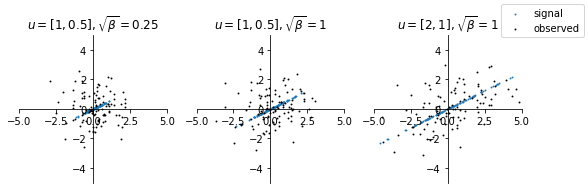

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n, p = 100, 2
np.random.seed(1)
b1, b2, b3 = 1/4, 1, 1
u1 = u2 = np.array([1, 0.5]).reshape(1,2)
u3 = np.array([2, 1]).reshape(1,2)
g0 = np.random.normal(size=(100,1))
g = np.random.normal(size=(100, 2))
signal1 = np.sqrt(b1) * g0 * u1
signal2 = np.sqrt(b2) * g0 * u2
signal3 = np.sqrt(b3) * g0 * u3
x1 = signal1 + g
x2 = signal2 + g
x3 = signal3 + g

fig, ax = plt.subplots(1,3, figsize=(9,3))
s = 0.8

ax[0].set_title(r'$u=[1,0.5], \sqrt{\beta}=0.25$')
ax[0].set(xlim=(-5, 5), ylim=(-5, 5))
ax[0].set_aspect('equal', 'box')
ax[0].scatter(signal1[:,0], signal1[:,1], s=s, c='C0', label='signal')
ax[0].scatter(x1[:,0], x1[:,1], s=s, c='k', label='observed')
ax[0].spines.left.set_position('center')
ax[0].spines.bottom.set_position('center')
ax[0].spines.right.set_color('none')
ax[0].spines.top.set_color('none')

ax[1].set_title(r'$u=[1,0.5], \sqrt{\beta}=1$')
ax[1].set(xlim=(-5, 5), ylim=(-5, 5))
ax[1].set_aspect('equal', 'box')
ax[1].scatter(signal2[:,0], signal2[:,1], s=s, c='C0')
ax[1].scatter(x2[:,0], x2[:,1], s=s, c='k')
ax[1].spines.left.set_position('center')
ax[1].spines.bottom.set_position('center')
ax[1].spines.right.set_color('none')
ax[1].spines.top.set_color('none')

ax[2].set_title(r'$u=[2,1], \sqrt{\beta}=1$')
ax[2].set(xlim=(-5, 5), ylim=(-5, 5))
ax[2].set_aspect('equal', 'box')
ax[2].scatter(signal3[:,0], signal3[:,1], s=s, c='C0')
ax[2].scatter(x3[:,0], x3[:,1], s=s, c='k')
ax[2].set_ylim
ax[2].spines.left.set_position('center')
ax[2].spines.bottom.set_position('center')
ax[2].spines.right.set_color('none')
ax[2].spines.top.set_color('none')

fig.legend()
plt.show()

Consider the mean and variance of the observed $\boldsymbol{x}$,

$$\begin{aligned}
\mathbb{E} [\boldsymbol{x}] &= \boldsymbol{0} \\
\boldsymbol{\Sigma}
&= \beta \boldsymbol{u} \boldsymbol{u} ^{\top}  \operatorname{Var}\left( g_0 \right) + \operatorname{Cov}\left( \boldsymbol{g} \right) \\
&= \beta \boldsymbol{u} \boldsymbol{u} ^{\top} + \boldsymbol{I} _p \\
\end{aligned}$$

It is easy to check $\boldsymbol{u}$ is the top eigenvector of $\boldsymbol{\Sigma}$. Let the (uncentered, biased) sample covariance matrix be $\boldsymbol{S} _n = \frac{1}{n} \sum_{i=1}^n \boldsymbol{x} _i \boldsymbol{x} _i ^{\top}$, where PCA (asymptotically??) works on. In expectation, $\mathbb{E} [\boldsymbol{S} _n] = \boldsymbol{\Sigma} = \beta \boldsymbol{u} \boldsymbol{u} ^{\top} + \boldsymbol{I}_p$. Hence, the top eigenvector of $\mathbb{E} [\boldsymbol{S} _n]$ is indeed $\boldsymbol{u}$. How about the top eigenvector of observed $\boldsymbol{S} _n$?

- Low-dimension regime: $\frac{p}{n} \rightarrow \gamma < 1$ as $n, p \rightarrow \infty$,
- High-dimension regime: $\frac{p}{n} \rightarrow \gamma > 1$ as $n, p \rightarrow \infty$,

For high-dim case, we analyze under what condition of $\beta$ and $\boldsymbol{u}$ can we detect $\boldsymbol{u}$, with random matrix theory.

It is easy to check that $\boldsymbol{x} \sim \boldsymbol{\Sigma}^{\frac{1}{2}} \boldsymbol{z}$ where $\boldsymbol{z} \sim \mathcal{N} (\boldsymbol{0} , \boldsymbol{I} _p)$. Then we can write $\boldsymbol{S}_n = \boldsymbol{\Sigma}^{\frac{1}{2}} \boldsymbol{Z} _n \boldsymbol{\Sigma}^{\frac{1}{2}}$ where $\boldsymbol{Z} _n = \frac{1}{n} \sum_{i=1}^n \boldsymbol{z} _i \boldsymbol{z} _i ^{\top}$. When $n \rightarrow \infty$, the eigenvalue $\lambda$ of $\boldsymbol{Z} _n$ has [Marchenko–Pastur distribution](https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution).

$$
f_{\gamma}(\lambda)=\frac{1}{2 \pi} \frac{\sqrt{\left(\gamma_{+}-\lambda\right)\left(\lambda-\gamma_{-}\right)}}{\gamma \lambda}, \quad \lambda \in \left[\gamma_{-}, \gamma_{+}\right]
$$

where $\gamma_- = (1 - \sqrt{\gamma})^2, \gamma_+ = (1+\sqrt{\gamma})^2$.

- When $\gamma > 1$, there is an additional point mass $(1- \frac{1}{\gamma} ) \delta(\lambda - 0)$ (??) at the origin.
- When sample size increases, $\gamma \rightarrow 0$, and the interval $\left[\gamma_{-}, \gamma_{+}\right]$ is tighter, i.e. more concentrated.

How is eigen values of $\boldsymbol{Z} _n$ related to $\boldsymbol{u}$?

.


.


.


.


.


.


.


.